Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 555ms/step - accuracy: 0.4681 - loss: 1.4024 - val_accuracy: 0.6839 - val_loss: 0.7818
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 494ms/step - accuracy: 0.7411 - loss: 0.7250 - val_accuracy: 0.7336 - val_loss: 0.6757
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 500ms/step - accuracy: 0.7765 - loss: 0.6176 - val_accuracy: 0.7455 - val_loss: 0.6403
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 498ms/step - accuracy: 0.7782 - loss: 0.5955 - val_accuracy: 0.7594 - val_loss: 0.6158
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 501ms/step - accuracy: 0.8195 - loss: 0.4865 - val_accuracy: 0.7535 - val_loss: 0.6372
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 501ms/step - accuracy: 0.8399 - loss: 0.4542 - val_accuracy: 0.7614 - val_loss: 0.6104
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 500ms/step - accuracy: 0.8471 - loss: 0.4073 - val_accuracy: 0.7555 - val_loss: 0.6202
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 495ms/step - accuracy: 0.8394 - loss: 0.4282 - val_accu

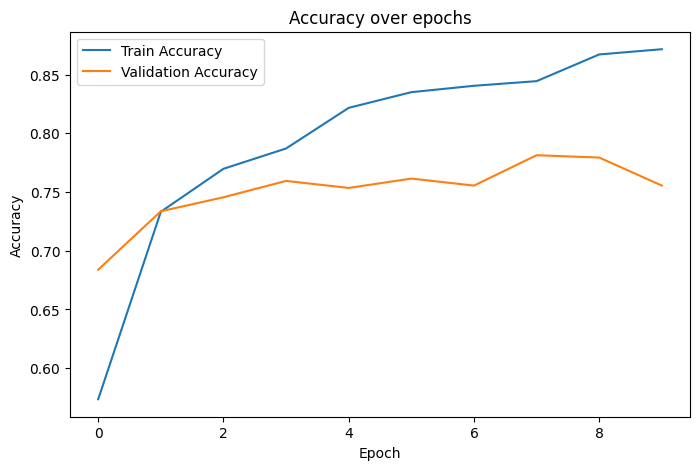

✅ Model saved to: C:\Users\sagni\Downloads\Trash-Detector\waste_classifier.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: glass (98.62% confidence)


In [1]:
# ✅ Install required libraries (if not already installed)
!pip install tensorflow matplotlib scikit-learn

# ✅ Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

# ✅ Dataset path
base_dir = r"C:\Users\sagni\Downloads\Trash-Detector\archive (1)\dataset-resized"

# ✅ Data Generators
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
val_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_gen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = val_gen.flow_from_directory(
    directory=base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ✅ Build Model (Transfer Learning)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 🚀 Train Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# 📊 Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 💾 Save Model (.h5 file to Trash-Detector folder)
save_path = r"C:\Users\sagni\Downloads\Trash-Detector\waste_classifier.h5"
model.save(save_path)
print(f"✅ Model saved to: {save_path}")

# 🔮 Prediction Function
def predict_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    pred = model.predict(tf.expand_dims(img_array, 0))
    labels = list(train_data.class_indices.keys())
    return labels[np.argmax(pred)], np.max(pred)

# ✅ Test Prediction
test_img = r"C:\Users\sagni\Downloads\Trash-Detector\archive (1)\dataset-resized\glass\glass1.jpg"
predicted_label, confidence = predict_image(test_img)
print(f"Prediction: {predicted_label} ({confidence*100:.2f}% confidence)")
